In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

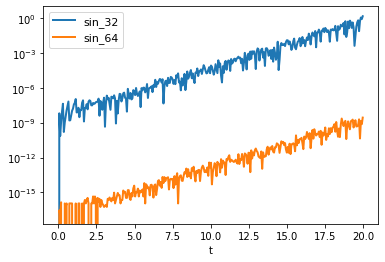

In [6]:
import matplotlib.pyplot as plt
import numpy as np

X_len = 20.0
X_step = 0.06
INFINITY = 100


def cal(X, is64: bool):
    Y = []
    for x in X:
        curr = x
        elem = curr
        for k in range(3, INFINITY, 2):
            curr *= -1
            if (is64):
                curr *= x * x / ((k - 1) * k)
                if abs(curr) < np.finfo(np.float64).eps:
                    break
            else:
                curr *= np.float32(x * x / ((k - 1) * k))
                if abs(curr) < np.finfo(np.float32).eps:
                    break
            elem += curr
        Y.append(elem)
    return Y


X32 = np.arange(np.float32(0), np.float32(X_len), np.float32(X_step))
Y32 = cal(X32, False)
X64 = np.arange(0.0, X_len, X_step)
Y64 = cal(X64, True)

R32 = []
R64 = []

for i in range(len(Y32)):
    R32.append(abs(Y32[i] - np.sin(X32)[i]))

for i in range(len(Y64)):
    R64.append(abs(Y64[i] - np.sin(X64)[i]))

plt.plot(X32, R32, linewidth=2, label=r'sin_32')
plt.plot(X64, R64, linewidth=2, label=r'sin_64')
plt.xlabel("t")
plt.legend(fontsize=11)
plt.yscale('log')
plt.show()
